### Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split # Import train_test_split
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install tensorflowjs
import tensorflowjs as tfjs

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [3]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer  # Mengimpor InputLayer
from sklearn.model_selection import train_test_split # Import train_test_split

### Data Loading (data yang sudah bersih)

In [4]:
dataset = pd.read_csv('/content/datasetcapscleanfix.csv')
dataset.head()

,Device ID,Device Type,Timestamp,On/Off Status,Energy Consumption (kWh),Usage Duration (hour),Energy Cost (Rp),SmartHomeEfficiency
0,1,Smart Speaker,2024-12-11 06:22:00,On,1.961607,15.307188,2652.092416,1
1,2,Ceiling Fan,2024-12-11 06:22:00,On,8.610689,19.973343,11641.651422,1
2,3,Security System,2024-12-11 06:22:00,On,2.651777,18.911535,3585.202010,1
3,4,Ceiling Fan,2024-12-11 06:22:00,On,2.341653,7.011127,3165.914978,0
4,5,Ceiling Fan,2024-12-11 06:22:00,On,4.859069,22.610684,6569.461503,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55403 entries, 0 to 55402
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Device ID                 55403 non-null  object 
 1   Device Type               55403 non-null  object 
 2   Timestamp                 55403 non-null  object 
 3   On/Off Status             55403 non-null  object 
 4   Energy Consumption (kWh)  55403 non-null  float64
 5   Usage Duration (hour)     55403 non-null  float64
 6   Energy Cost (Rp)          55403 non-null  float64
 7   SmartHomeEfficiency       55403 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 3.4+ MB


In [6]:
# Hitung 0 dan 1nya
print(dataset['SmartHomeEfficiency'].value_counts())


SmartHomeEfficiency
0    42415
1    12988
Name: count, dtype: int64


In [7]:
coba = dataset.copy()

### Prepocessing


New distribution of SmartHomeEfficiency:
SmartHomeEfficiency
1    12988
0    12988
Name: count, dtype: int64


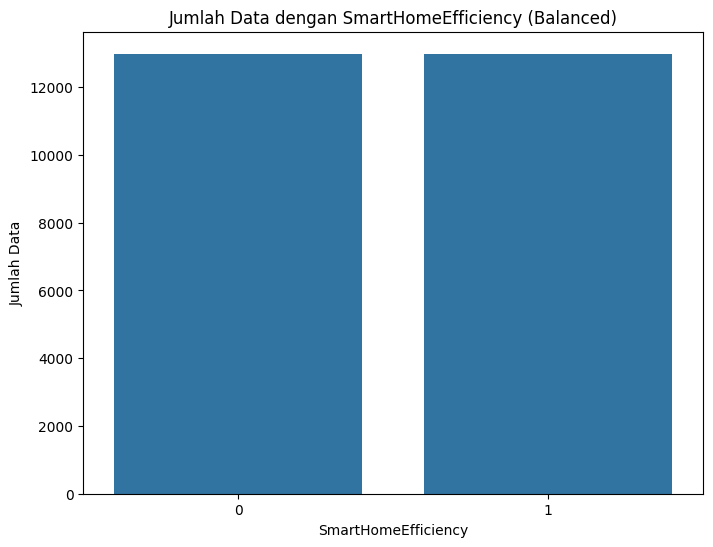

In [8]:
# Drop data yang smarthomeefficiency 0 sesuaikan dengan jumlah 1

import pandas as pd
import matplotlib.pyplot as plt
# Filter data where SmartHomeEfficiency is 1
df_ones = coba[coba['SmartHomeEfficiency'] == 1]

# Count the number of samples with SmartHomeEfficiency = 1
count_ones = len(df_ones)

# Filter data where SmartHomeEfficiency is 0
df_zeros = coba[coba['SmartHomeEfficiency'] == 0]

# Randomly sample the same number of samples as count_ones from df_zeros
df_zeros_sampled = df_zeros.sample(n=count_ones, random_state=42) # Use a random_state for reproducibility

# Combine the sampled dataframes
coba = pd.concat([df_ones, df_zeros_sampled])

# Verify the distribution of the target variable in the new dataframe
print("\nNew distribution of SmartHomeEfficiency:")
print(coba['SmartHomeEfficiency'].value_counts())

# Plot the new distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='SmartHomeEfficiency', data=coba)
plt.title('Jumlah Data dengan SmartHomeEfficiency (Balanced)')
plt.xlabel('SmartHomeEfficiency')
plt.ylabel('Jumlah Data')
plt.show()

In [9]:
# Drop non-numerical columns
X = coba.drop(columns=['SmartHomeEfficiency', 'Device ID', 'Device Type', 'Timestamp', 'On/Off Status'])  # Features
y = coba['SmartHomeEfficiency']

**Splitting Data**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(20780, 3), y_train=(20780,)
Test set shape: X_test=(5196, 3), y_test=(5196,)


In [11]:
# SMOTE untuk data train saja
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
# Cek Balancing data train
print(y_train_resampled.value_counts())

SmartHomeEfficiency
1    10391
0    10391
Name: count, dtype: int64


### Data Modeling

In [13]:
input_dim = X_train.shape[1]

In [14]:
print(X.shape)

(25976, 3)


In [15]:
# Membuat model dengan 1 hidden layer menggunakan batch_input_shape pada InputLayer
model1 = Sequential([
    InputLayer(batch_input_shape=(None, input_dim)),
    Dense(16, activation='relu'),  # Layer tersembunyi
    Dense(1, activation='sigmoid')  # Output layer untuk klasifikasi biner
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training Model 1 (1 hidden layer)...")
model1.fit(X_train, y_train, epochs=50, batch_size=4, verbose=0)

Training Model 1 (1 hidden layer)...


In [16]:
# Evaluasi Model 1 untuk training dan testing
loss1, acc1 = model1.evaluate(X_train, y_train, verbose=0)
print(f"Model 1 Training Accuracy: {acc1:.4f}")

loss1, acc1 = model1.evaluate(X_test, y_test, verbose=0)
print(f"Model 1 Test Accuracy: {acc1:.4f}")

y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")
print("Classification report Model 1:")
print(classification_report(y_test, y_pred1))

Model 1 Training Accuracy: 0.9190
Model 1 Test Accuracy: 0.9222
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification report Model 1:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2597
           1       0.92      0.92      0.92      2599

    accuracy                           0.92      5196
   macro avg       0.92      0.92      0.92      5196
weighted avg       0.92      0.92      0.92      5196



### Inferensi

In [26]:
# Fungsi untuk menghitung tarif per KWh berdasarkan daya listrik
def get_tarif_per_kwh(daya_listrik):
    if daya_listrik == 450:
        return 415
    elif daya_listrik == 900:
        return 1352
    elif daya_listrik == 1300:
        return 1444
    elif daya_listrik == 2200:
        return 1444
    else:
        print("Daya listrik tidak valid, tarif default digunakan (Rp. 1.444/kWh).")
        return 1444

# Fungsi untuk menghitung konsumsi energi berdasarkan daya perangkat dan durasi penggunaan
def calculate_energy_consumption(daya_perangkat, durasi_penggunaan):
    # Konsumsi energi = daya perangkat (Watt) * durasi (jam) / 1000 (untuk mengkonversi ke kWh)
    return (daya_perangkat * durasi_penggunaan) / 1000  # dalam kWh

# Fungsi untuk meminta input dari pengguna
def get_user_input():
    # Meminta input dari pengguna
    device_id = input("Masukkan Device ID: ")
    device_type = input("Masukkan Device Type (misalnya, AC, Heater, Refrigerator): ")

    # Input daya perangkat (Watt)
    daya_perangkat = int(input(f"Masukkan daya perangkat {device_type} (Watt): "))
    # Input durasi penggunaan (jam)
    usage_duration = float(input("Masukkan Usage Duration (hour): "))

    # Menghitung konsumsi energi
    energy_consumption = calculate_energy_consumption(daya_perangkat, usage_duration)

    # Input daya listrik rumah
    daya_listrik = int(input("Masukkan daya listrik rumah (450, 900, 1300, 2200): "))

    # Menghitung tarif per kWh berdasarkan daya listrik
    tarif_per_kwh = get_tarif_per_kwh(daya_listrik)

    # Menghitung Energy Cost (Rp)
    energy_cost = energy_consumption * tarif_per_kwh  # Menggunakan tarif per kWh dari daya listrik

    # Mengembalikan data dalam bentuk list (fitur input tanpa Device ID, Device Type, Timestamp, On/Off Status)
    return [energy_consumption, usage_duration, energy_cost]  # Hanya mengembalikan 3 fitur


# Mendapatkan input dari pengguna
user_input = get_user_input()

# Mengubah input menjadi array untuk prediksi
X_new = np.array([user_input])  # Data fitur input sekarang (1, 3)

# Model 1: NN dengan 1 hidden layer
# Asumsi bahwa model1 sudah dilatih sebelumnya dengan data training yang relevan.
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(3,)),  # input_dim=3 untuk 3 fitur input
    Dense(1, activation='sigmoid')  # Output 1 untuk klasifikasi 0 atau 1
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melakukan prediksi dengan model yang sudah dilatih
prediksi = model1.predict(X_new)

# Menampilkan hasil prediksi
print(f"Hasil prediksi untuk data yang dimasukkan: {prediksi[0][0]} (Probabilitas efisien)")

# Menampilkan hasil prediksi sebagai 0 atau 1
if prediksi[0][0] >= 0.5:
    print("Prediksi: Perangkat Tidak Efisien (0)")
else:
    print("Prediksi: Perangkat Efisien (1)")

Masukkan Device ID: 78
Masukkan Device Type (misalnya, AC, Heater, Refrigerator): Lights
Masukkan daya perangkat Lights (Watt): 1000
Masukkan Usage Duration (hour): 9
Masukkan daya listrik rumah (450, 900, 1300, 2200): 2200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Hasil prediksi untuk data yang dimasukkan: 1.0 (Probabilitas efisien)
Prediksi: Perangkat Tidak Efisien (0)


**Output**

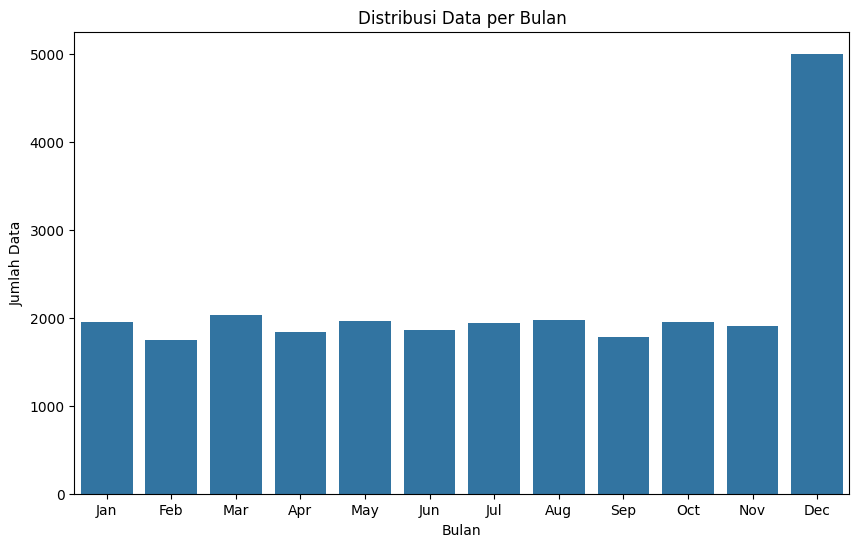

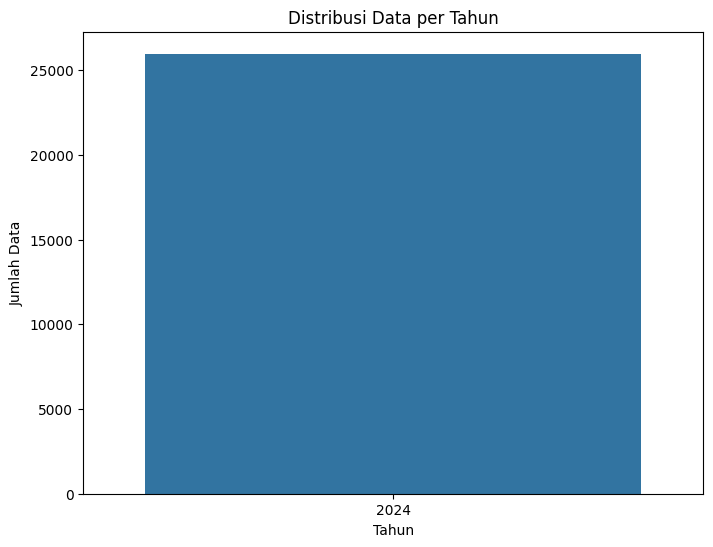

In [18]:
# Diagram bar dataset

# Pastikan kolom 'Timestamp' ada dan dalam format datetime
coba['Timestamp'] = pd.to_datetime(coba['Timestamp'])

# Ekstrak komponen tanggal
coba['Date'] = coba['Timestamp'].dt.date
coba['Month'] = coba['Timestamp'].dt.month
coba['Year'] = coba['Timestamp'].dt.year

# Diagram bar untuk jumlah data per bulan
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=coba)
plt.title('Distribusi Data per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Data')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Diagram bar untuk jumlah data per tahun
plt.figure(figsize=(8, 6))
sns.countplot(x='Year', data=coba)
plt.title('Distribusi Data per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Data')
plt.show()


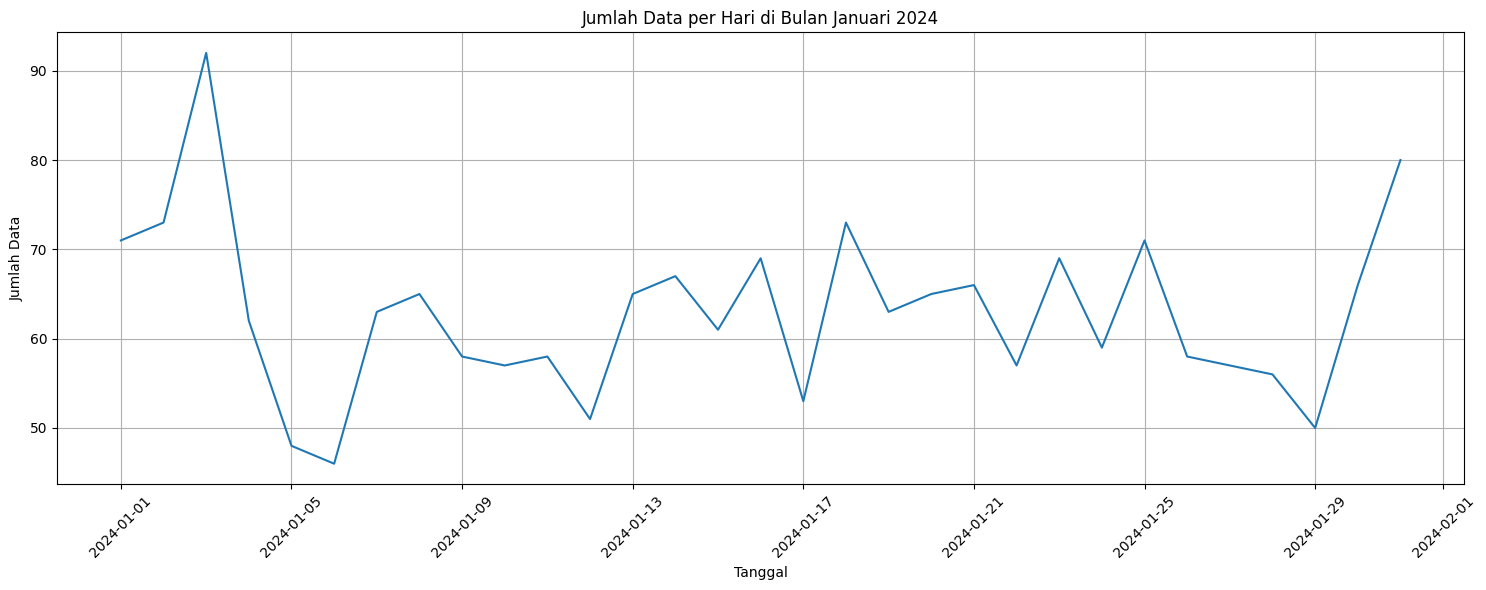

In [19]:
# Diagram garis tanggal 1 januari -31 januari 2024

# Filtering data for January 2024
january_2024_data = coba[(coba['Year'] == 2024) & (coba['Month'] == 1)]

# Group by date and count the number of entries
data_per_day_january = january_2024_data.groupby('Date').size()

# Create a date range for January 1 to January 31, 2024
january_dates = pd.date_range(start='2024-01-01', end='2024-01-31').date

# Reindex the data_per_day_january to include all dates in January, filling missing dates with 0
data_per_day_january = data_per_day_january.reindex(january_dates, fill_value=0)

# Create the line plot
plt.figure(figsize=(15, 6))
data_per_day_january.plot(kind='line')
plt.title('Jumlah Data per Hari di Bulan Januari 2024')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Menambahkan kolom 'Month' dan 'Year' dari kolom 'Timestamp' pada dataframe coba
coba['Month'] = coba['Timestamp'].dt.month
coba['Year'] = coba['Timestamp'].dt.year

# Kelompokkan data berdasarkan bulan dan tahun
monthly_analysis = coba.groupby(['Year', 'Month'])

# Hitung rata-rata Energy Consumption dan Energy Cost per perangkat per bulan
monthly_summary = monthly_analysis[['Energy Consumption (kWh)', 'Energy Cost (Rp)']].mean()

def get_efficiency_result(group):
    if group['SmartHomeEfficiency'].sum() > len(group) / 2:  # Jika mayoritas 0 (tidak hemat)
        return 'Penggunaan Energy bulan ini TIDAK HEMAT (BOROS)'
    else:
        return 'Penggunaan Energy bulan ini HEMAT'  # Jika mayoritas 1 ( hemat)

# Apply fungsi untuk menentukan mayoritas
monthly_summary['Result'] = monthly_analysis.apply(get_efficiency_result)

# Reset index agar kolom 'Year' dan 'Month' menjadi kolom biasa
monthly_summary.reset_index(inplace=True)

# Tampilkan hasil analisis bulanan
print("\nAnalisis Bulanan:")
print(monthly_summary)



Analisis Bulanan:
    Year  Month  Energy Consumption (kWh)  Energy Cost (Rp)  \
0   2024      1                  0.648365       1244.861245   
1   2024      2                  0.634966       1219.134206   
2   2024      3                  0.621812       1193.878237   
3   2024      4                  0.616500       1183.679248   
4   2024      5                  0.601145       1154.198834   
5   2024      6                  0.609043       1169.363268   
6   2024      7                  0.593311       1139.157379   
7   2024      8                  0.631182       1211.869109   
8   2024      9                  0.581982       1117.406250   
9   2024     10                  0.545738       1047.817711   
10  2024     11                  0.571094       1096.501135   
11  2024     12                  3.152433       4386.415265   

                                             Result  
0                 Penggunaan Energy bulan ini HEMAT  
1                 Penggunaan Energy bulan ini HEMAT  

<ipython-input-20-2953634402>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_summary['Result'] = monthly_analysis.apply(get_efficiency_result)


In [21]:
# Analisis bulanan

def get_month_name(month_number):
    month_names = {
        1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April',
        5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
        9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
    }
    return month_names.get(month_number, 'Bulan tidak valid')

def analyze_month(data, year, month_number):
    """
    Melakukan analisis bulanan untuk konsumsi dan biaya energi.

    Args:
        data (pd.DataFrame): DataFrame yang mengandung data energi.
        year (int): Tahun yang akan dianalisis.
        month_number (int): Nomor bulan yang akan dianalisis (1-12).
    """
    month_name = get_month_name(month_number)

    # Filter data untuk tahun dan bulan yang dipilih
    monthly_data = data[(data['Year'] == year) & (data['Month'] == month_number)]

    if monthly_data.empty:
        print(f"\nTidak ada data untuk bulan {month_name} tahun {year}.")
        return

    # Hitung rata-rata Energy Consumption dan Energy Cost per perangkat
    avg_energy_consumption_per_device = monthly_data['Energy Consumption (kWh)'].mean()
    avg_energy_cost_per_device = monthly_data['Energy Cost (Rp)'].mean()

    print(f"\nAnalisis untuk Bulan: {month_name} {year}")
    print(f"Energy Consumption (Rata-rata energyconsumption perdevice): {avg_energy_consumption_per_device:.4f} kWh")
    print(f"Energy Cost (Rata-rata energycost perdevice): Rp {avg_energy_cost_per_device:,.2f}")

    # Menentukan efisiensi bulan berdasarkan mayoritas SmartHomeEfficiency
    efficiency_counts = monthly_data['SmartHomeEfficiency'].value_counts()
    if 0 in efficiency_counts and 1 in efficiency_counts:
      if efficiency_counts[0] > efficiency_counts[1]:
          print("Hasil Efisiensi: Penggunaan Energy bulan ini HEMAT")
      else:
          print("Hasil Efisiensi: Penggunaan Energy bulan ini TIDAK HEMAT")
    elif 0 in efficiency_counts:
         print("Hasil Efisiensi: Penggunaan Energy bulan ini HEMAT")
    elif 1 in efficiency_counts:
         print("Hasil Efisiensi: Penggunaan Energy bulan ini TIDAK HEMAT")
    else:
         print("Tidak ada data efisiensi untuk bulan ini.")


analyze_month(coba, 2024, 1)



Analisis untuk Bulan: Januari 2024
Energy Consumption (Rata-rata energyconsumption perdevice): 0.6484 kWh
Energy Cost (Rata-rata energycost perdevice): Rp 1,244.86
Hasil Efisiensi: Penggunaan Energy bulan ini HEMAT


### Convert menyimpan model

In [22]:
# Menyimpan model ke dalam format TensorFlow.js
tfjs.converters.save_keras_model(model1, 'path_to_save_model/tfjs_model')


failed to lookup keras version from the file,
    this is likely a weight only file


In [23]:
# Menyimpan model ke dalam format JSON
model_json = model1.to_json()

# Menyimpan model JSON ke file
with open("model1.json", "w") as json_file:
    json_file.write(model_json)


In [24]:
# Menyimpan bobot model ke dalam file HDF5
model1.save_weights("model1.weights.h5")


In [31]:
# Save the trained model to an HDF5 file
model1.save('model.h5')
print("Model model1 telah disimpan sebagai model.h5")

Model model1 telah disimpan sebagai model.h5
